In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [38]:
df = pd.read_csv('banking.csv')
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,...,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,...,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


In [39]:
x = df[[col_name for col_name in df.columns if df[col_name].dtype in ['int64', 'float64']]]
y = df.y

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [76]:
log_reg = LogisticRegression().fit(x_train, y_train)

D:\python_projects\python_3_10_9\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
y_pred = log_reg.predict(x_test)

In [78]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10709,   272],
       [  712,   664]], dtype=int64)

<AxesSubplot: >

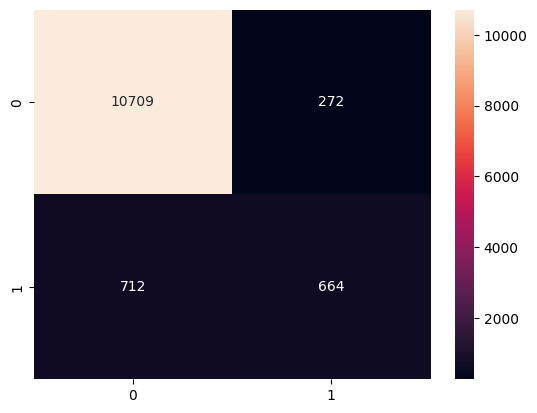

In [79]:
ax = plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax)

In [80]:
print('Accurancy:', metrics.accuracy_score(y_test, y_pred))

Accurancy: 0.9203690216071863


In [81]:
print('Точність:', metrics.precision_score(y_test, y_pred))

Точність: 0.7094017094017094


In [82]:
print('Повнота:', metrics.recall_score(y_test, y_pred))

Повнота: 0.48255813953488375


In [83]:
print('Повнота:', metrics.f1_score(y_test, y_pred, average=None))

Повнота: [0.95607535 0.57439446]


In [84]:
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

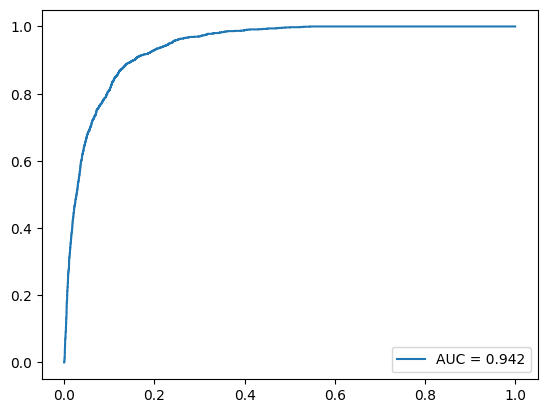

In [90]:
plt.plot(fpr,tpr, label="AUC = {:.3f}".format(auc))
plt.legend(loc=4)
plt.show()